In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define a function to create the model with variable hidden layer sizes and number of layers
def create_model(hidden_sizes):
    layers = []
    layers.append(nn.Linear(28 * 28, hidden_sizes[0]))
    layers.append(nn.ReLU())
    for i in range(1, len(hidden_sizes)):
        layers.append(nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]))
        layers.append(nn.ReLU())
    layers.append(nn.Linear(hidden_sizes[-1], 10))
    return nn.Sequential(*layers)

# Define training and testing datasets and loaders
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)  # Change batch size to 128
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)   # Change batch size to 128

# Define a function to train and evaluate the model
def train_and_evaluate_model(model, optimizer, criterion, train_loader, test_loader, num_epochs=25):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs.view(-1, 28 * 28))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:  # print every 100 mini-batches
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                running_loss = 0.0

    print('Finished Training')

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images.view(-1, 28 * 28))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Accuracy on test set: {accuracy}%')
    return accuracy

# Define configurations with learning rates and optimizers
configs = [
    {"hidden_sizes": [32, 16], "num_layers": 2, "lr": 0.001, "optimizer": optim.SGD},
    {"hidden_sizes": [32, 16], "num_layers": 2, "lr": 0.002, "optimizer": optim.Adam},
    {"hidden_sizes": [32, 16], "num_layers": 2, "lr": 0.003, "optimizer": optim.RMSprop},
    {"hidden_sizes": [64, 32, 16], "num_layers": 3, "lr": 0.002, "optimizer": optim.Adam},
    {"hidden_sizes": [64, 32, 16], "num_layers": 3, "lr": 0.003, "optimizer": optim.RMSprop},

    {"hidden_sizes": [128, 64, 32, 16], "num_layers": 4, "lr": 0.001, "optimizer": optim.SGD},
    {"hidden_sizes": [128, 64, 32, 16], "num_layers": 4, "lr": 0.003, "optimizer": optim.RMSprop},

    {"hidden_sizes": [256, 128, 64, 32, 16], "num_layers": 5, "lr": 0.001, "optimizer": optim.SGD},
    {"hidden_sizes": [256, 128, 64, 32, 16], "num_layers": 5, "lr": 0.002, "optimizer": optim.Adam},

    {"hidden_sizes": [64, 64, 64], "num_layers": 3, "lr": 0.001, "optimizer": optim.SGD},
    {"hidden_sizes": [64, 64, 64], "num_layers": 3, "lr": 0.002, "optimizer": optim.Adam},
    {"hidden_sizes": [64, 64, 64], "num_layers": 3, "lr": 0.003, "optimizer": optim.RMSprop},

    {"hidden_sizes": [128, 128, 128, 128], "num_layers": 4, "lr": 0.001, "optimizer": optim.SGD},
    {"hidden_sizes": [128, 128, 128, 128], "num_layers": 4, "lr": 0.003, "optimizer": optim.RMSprop},

    {"hidden_sizes": [256, 128, 64], "num_layers": 3, "lr": 0.001, "optimizer": optim.SGD},

    {"hidden_sizes": [256, 128, 64], "num_layers": 3, "lr": 0.003, "optimizer": optim.RMSprop},

    {"hidden_sizes": [128, 64], "num_layers": 2, "lr": 0.001, "optimizer": optim.SGD},

    {"hidden_sizes": [128, 64], "num_layers": 2, "lr": 0.003, "optimizer": optim.RMSprop},

    {"hidden_sizes": [32], "num_layers": 1, "lr": 0.001, "optimizer": optim.SGD},

    {"hidden_sizes": [256], "num_layers": 1, "lr": 0.002, "optimizer": optim.Adam},


]

# Track accuracy for each configuration
accuracies = []

# Train and evaluate models for each configuration
for config in configs:
    print(f"\nConfiguration: {config}")
    model = create_model(config["hidden_sizes"])
    optimizer = config["optimizer"](model.parameters(), lr=config["lr"])
    criterion = nn.CrossEntropyLoss()
    accuracy = train_and_evaluate_model(model, optimizer, criterion, train_loader, test_loader)
    accuracies.append({"config": config, "accuracy": accuracy})

# Print the highest accuracy configuration
best_config = max(accuracies, key=lambda x: x["accuracy"])
print("\nBest Configuration:")
print(f"Hidden Sizes: {best_config['config']['hidden_sizes']}, Num Layers: {best_config['config']['num_layers']}, "
      f"Learning Rate: {best_config['config']['lr']}, Optimizer: {best_config['config']['optimizer'].__name__}, "
      f"Accuracy: {best_config['accuracy']}")



Configuration: {'hidden_sizes': [32, 16], 'num_layers': 2, 'lr': 0.001, 'optimizer': <class 'torch.optim.sgd.SGD'>}
Epoch 1, Batch 100, Loss: 2.2925168442726136
Epoch 1, Batch 200, Loss: 2.260127696990967
Epoch 1, Batch 300, Loss: 2.227011594772339
Epoch 1, Batch 400, Loss: 2.190540807247162
Epoch 2, Batch 100, Loss: 2.121371352672577
Epoch 2, Batch 200, Loss: 2.071970522403717
Epoch 2, Batch 300, Loss: 2.0217204797267914
Epoch 2, Batch 400, Loss: 1.9669514966011048
Epoch 3, Batch 100, Loss: 1.8560229694843293
Epoch 3, Batch 200, Loss: 1.7918583726882935
Epoch 3, Batch 300, Loss: 1.7303901398181916
Epoch 3, Batch 400, Loss: 1.6620946264266967
Epoch 4, Batch 100, Loss: 1.5573035025596618
Epoch 4, Batch 200, Loss: 1.5056550598144531
Epoch 4, Batch 300, Loss: 1.454721747636795
Epoch 4, Batch 400, Loss: 1.4043286514282227
Epoch 5, Batch 100, Loss: 1.3301444196701049
Epoch 5, Batch 200, Loss: 1.2845047998428345
Epoch 5, Batch 300, Loss: 1.2425997507572175
Epoch 5, Batch 400, Loss: 1.199391

Part2

4422102/4422102 [==============================] - 0s 0us/step
Training and evaluating Model 1 with configuration: {'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu'}
313/313 [==============================] - 3s 9ms/step - loss: 0.2656 - accuracy: 0.9050
Model 1 Test accuracy: 0.9049999713897705
1/1 [==============================] - 0s 109ms/step


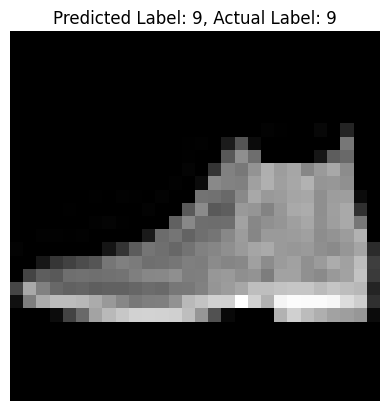

Training and evaluating Model 2 with configuration: {'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'tanh'}
313/313 [==============================] - 3s 8ms/step - loss: 0.2843 - accuracy: 0.9001
Model 2 Test accuracy: 0.9000999927520752
1/1 [==============================] - 0s 71ms/step


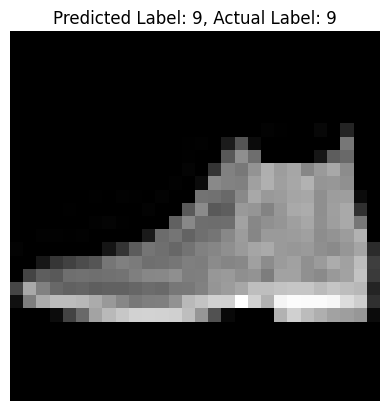

Training and evaluating Model 3 with configuration: {'kernel_size': (5, 5), 'pool_size': (2, 2), 'activation': 'relu'}
313/313 [==============================] - 3s 10ms/step - loss: 0.2753 - accuracy: 0.9002
Model 3 Test accuracy: 0.9002000093460083
1/1 [==============================] - 0s 70ms/step


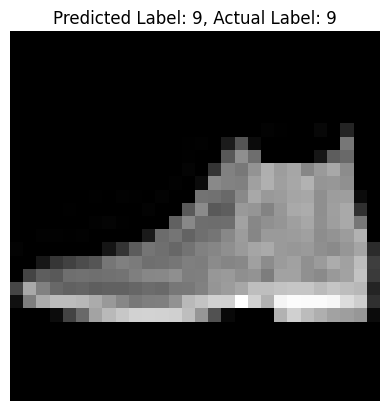

Training and evaluating Model 4 with configuration: {'kernel_size': (3, 3), 'pool_size': (3, 3), 'activation': 'relu'}
313/313 [==============================] - 2s 6ms/step - loss: 0.3095 - accuracy: 0.8902
Model 4 Test accuracy: 0.8902000188827515
1/1 [==============================] - 0s 130ms/step


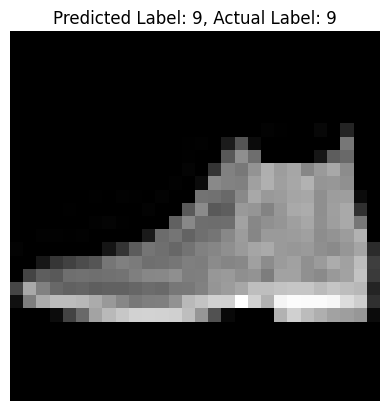

Training and evaluating Model 5 with configuration: {'kernel_size': (5, 5), 'pool_size': (3, 3), 'activation': 'relu'}
313/313 [==============================] - 2s 7ms/step - loss: 0.3196 - accuracy: 0.8862
Model 5 Test accuracy: 0.8862000107765198


1/1 [==============================] - 0s 103ms/step


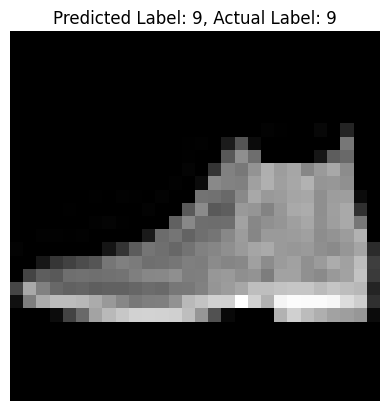

Training and evaluating Model 6 with configuration: {'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'sigmoid'}
313/313 [==============================] - 4s 12ms/step - loss: 0.3931 - accuracy: 0.8574


Model 6 Test accuracy: 0.8574000000953674
1/1 [==============================] - 0s 78ms/step


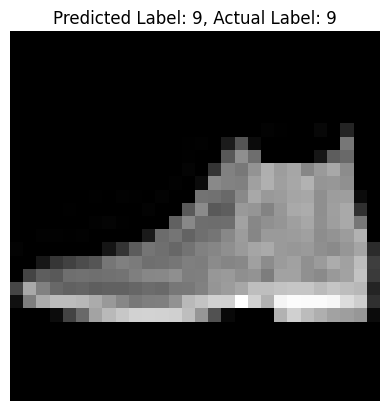

Training and evaluating Model 7 with configuration: {'kernel_size': (5, 5), 'pool_size': (2, 2), 'activation': 'tanh'}
313/313 [==============================] - 4s 12ms/step - loss: 0.2857 - accuracy: 0.9042
Model 7 Test accuracy: 0.90420001745224
1/1 [==============================] - 0s 67ms/step


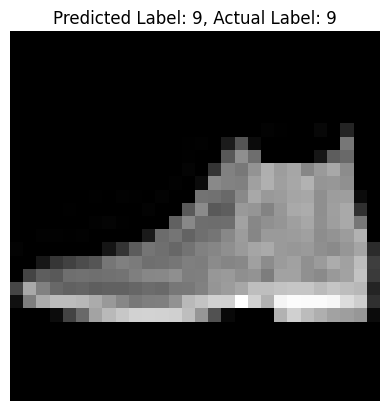

Training and evaluating Model 8 with configuration: {'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu'}
313/313 [==============================] - 3s 11ms/step - loss: 0.2710 - accuracy: 0.9012
Model 8 Test accuracy: 0.901199996471405
1/1 [==============================] - 0s 86ms/step


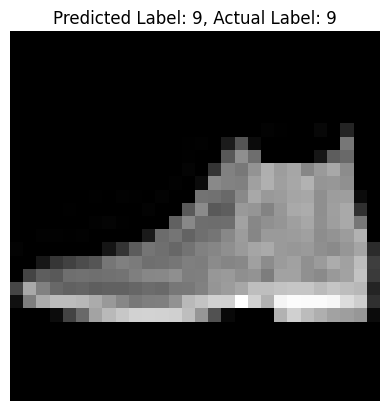

Training and evaluating Model 9 with configuration: {'kernel_size': (5, 5), 'pool_size': (3, 3), 'activation': 'sigmoid'}
313/313 [==============================] - 2s 6ms/step - loss: 0.4170 - accuracy: 0.8473
Model 9 Test accuracy: 0.8472999930381775
1/1 [==============================] - 0s 74ms/step


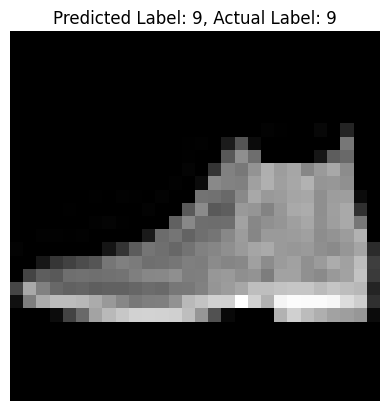

Training and evaluating Model 10 with configuration: {'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu'}
313/313 [==============================] - 4s 12ms/step - loss: 0.2882 - accuracy: 0.8972
Model 10 Test accuracy: 0.8971999883651733
1/1 [==============================] - 0s 159ms/step


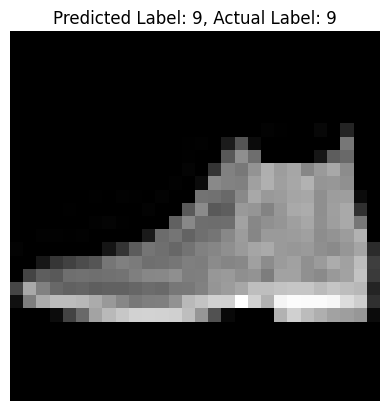

In [6]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

# Mapping the labels for the MNIST dataset
labels_map = {
    0: "0", 1: "1", 2: "2", 3: "3", 4: "4",
    5: "5", 6: "6", 7: "7", 8: "8", 9: "9"
}

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data for CNN
x_train_cnn = np.expand_dims(x_train, axis=-1)
x_test_cnn = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define function to create CNN model
def create_cnn_model(kernel_size=(3, 3), pool_size=(2, 2), activation='relu'):
    model = Sequential()
    model.add(Conv2D(32, kernel_size, activation=activation, input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size))
    model.add(Conv2D(64, kernel_size, activation=activation))
    model.add(MaxPooling2D(pool_size))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(10, activation='softmax'))
    return model

# Configurations
configurations = [
    # Configuration 1
    {'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu'},
    # Configuration 2
    {'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'tanh'},
    # Configuration 3
    {'kernel_size': (5, 5), 'pool_size': (2, 2), 'activation': 'relu'},
    # Configuration 4
    {'kernel_size': (3, 3), 'pool_size': (3, 3), 'activation': 'relu'},
    # Configuration 5
    {'kernel_size': (5, 5), 'pool_size': (3, 3), 'activation': 'relu'},
    # Configuration 6
    {'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'sigmoid'},
    # Configuration 7
    {'kernel_size': (5, 5), 'pool_size': (2, 2), 'activation': 'tanh'},
    # Configuration 8
    {'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu'},
    # Configuration 9
    {'kernel_size': (5, 5), 'pool_size': (3, 3), 'activation': 'sigmoid'},
    # Configuration 10
    {'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu'},
]

# Train and evaluate models
for i, config in enumerate(configurations):
    print(f"Training and evaluating Model {i+1} with configuration: {config}")

    # Create the model
    model = create_cnn_model(kernel_size=config['kernel_size'], pool_size=config['pool_size'], activation=config['activation'])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train_cnn, y_train, epochs=10, batch_size=128, verbose=0, validation_split=0.2)

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test_cnn, y_test)
    print(f'Model {i+1} Test accuracy:', accuracy)

    # Plot the test image with predicted and actual labels
    image_index = 0  # Change this index to view different images
    test_image = x_test[image_index]
    test_label = np.argmax(y_test[image_index])
    test_image_reshaped = np.expand_dims(test_image, axis=0)
    predicted_label = np.argmax(model.predict(test_image_reshaped), axis=-1)

    plt.imshow(test_image, cmap='gray')
    plt.title(f'Predicted Label: {predicted_label[0]}, Actual Label: {test_label}')
    plt.axis('off')
    plt.show()


Part3